In [15]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import leastsq
from func import *

In [16]:
hdu = fits.open('HE0232-0900.wo_absorption.fits')
qso_data = hdu[0].data
qso_error = hdu[1].data
qso_header = hdu[0].header
wavestart = qso_header['CRVAL3']
wavint = qso_header['CD3_3']
[central_x,central_y]= [67,51]

In [17]:
z = 0.043143
k = 1+z

In [25]:
wave = np.arange(wavestart,(wavestart+(wavint*qso_data.shape[0])),wavint)#start,stop,step
select =(wave>4700*k)&(wave<6900*k)

In [26]:
y = qso_data[:,51,67][select]
x = wave[select]
y_err = qso_error[:,51,67][select]

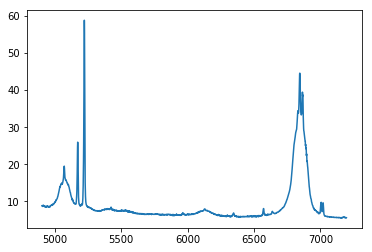

In [27]:
plt.plot(x,y)
plt.show()

In [24]:
def SII_doublet_gauss(wave,amp_SII6716,amp_SII6731,vel,vel_sigma):
    SII_6716 = gauss(wave,amp_SII6716,vel,vel_sigma,6716)
    SII_6731 = gauss(wave,amp_SII6731,vel,vel_sigma,6731)
    return SII_6716+SII_6731

def full_gauss(p,wave,data,error):
    (amp_SII6716,amp_SII6731,vel_SII6731,vel_sigma_SII6731,amp_SII6716_br,amp_SII6731_br,vel_SII6731_br,vel_sigma_SII6731_br,m,c)=p
    narrow_SII = SII_doublet_gauss(wave,amp_SII6716,amp_SII6731,vel_SII6731,vel_sigma_SII6731)
    broad_SII = SII_doublet_gauss(wave,amp_SII6716_br,amp_SII6731_br,vel_SII6731_br,vel_sigma_SII6731_br)
    #broad_SII = 0
    cont = (wave/1000)*m+c
    return (narrow_SII+ broad_SII+cont-data)/error

In [7]:
#It was chieved by trial and error. Could you improve it?
p_init=(2.83622660e+00,3.42965891e+00,1.29255590e+04,1.45217922e+02,1.88312790e-01,8.03182732e-01,1.24078411e+04,1.40669005e+02,-1.27882152e+01,9.60099374e+01)

In [8]:
popt,pcov = leastsq(full_gauss,x0=p_init,args=(x,y,y_err))
print popt
[amp_SII6716,amp_SII6731,vel_SII6731,vel_sigma_SII6731,amp_SII6716_br,amp_SII6731_br,vel_SII6731_br,vel_sigma_SII6731_br,m,c] = popt
fit = full_gauss(popt,x,y,y_err)*y_err+y
residual = y - fit

[ 2.83618041e+00  3.42965290e+00  1.29255581e+04  1.45078286e+02
  1.88303302e-01  8.03212947e-01  1.24078311e+04  1.40666716e+02
 -1.27883294e+01  9.60107405e+01]


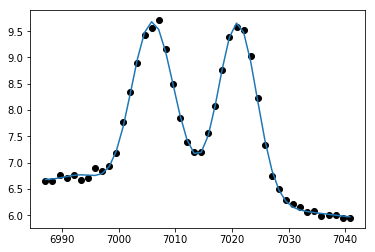

In [9]:
plt.plot(x,y,'ko')
plt.plot(x,fit)
plt.show()

In [12]:
ratio_core = (amp_SII6731/amp_SII6716)
ratio_wing = (amp_SII6731_br/amp_SII6716_br)
print ratio_core,ratio_wing

1.2092506116988602 4.265527678903007


In [14]:
vel_offset = vel_SII6731 - vel_SII6731_br
print vel_offset

517.7270459692863
